Importing Libaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Converitng text to csv format

In [2]:
X_train = pd.read_csv("X_train.txt", sep='\s+', header=None)
y_train = pd.read_csv("y_train.txt", sep='\s+', header=None)

train_data = pd.concat([X_train, y_train], axis=1)

column_names = [f"Feature_{i+1}" for i in range(X_train.shape[1])]
column_names.append("Activity")
train_data.columns = column_names

train_data.to_csv("train_data.csv", index=False)

In [3]:
train_data.shape

(7352, 562)

Converitng text to csv format

In [4]:
X_test = pd.read_csv("X_test.txt", sep='\s+', header=None)
y_test = pd.read_csv("y_test.txt", sep='\s+', header=None)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.columns = column_names
test_data.to_csv("test_data.csv", index=False)

In [5]:
test_data.shape

(2947, 562)

In [6]:
df_train = pd.read_csv("train_data.csv")

In [7]:
df_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_553,Feature_554,Feature_555,Feature_556,Feature_557,Feature_558,Feature_559,Feature_560,Feature_561,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [8]:
df_train.shape

(7352, 562)

In [9]:
df_train.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_553,Feature_554,Feature_555,Feature_556,Feature_557,Feature_558,Feature_559,Feature_560,Feature_561,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


In [10]:
df_test = pd.read_csv("test_data.csv")

In [11]:
df_test.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_553,Feature_554,Feature_555,Feature_556,Feature_557,Feature_558,Feature_559,Feature_560,Feature_561,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [12]:
df_test.shape

(2947, 562)

In [13]:
df_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_553,Feature_554,Feature_555,Feature_556,Feature_557,Feature_558,Feature_559,Feature_560,Feature_561,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [14]:
df_test.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_553,Feature_554,Feature_555,Feature_556,Feature_557,Feature_558,Feature_559,Feature_560,Feature_561,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,6.000000


**Approach 1:** Data used is X_train + y_train


Description:  Used only X_train + y_train and performed a 80%(train), 20%(test) train test split. Used Decision tree classifier with varying tree depth from range 1 to 20.


Training the decison tree clasifier for different tree depths from 1 to 20.


For each tree depth:
The model is trained on the training data (X_train, y_train).
Predictions are made on both training and test data.
Training and test accuracies are calculated and stored.

In [15]:
# Training the decison tree clasifier for different tree depths from 1 to 20
X = df_train.drop(columns=["Activity"])
y = df_train["Activity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
test_accuracies = []
tree_depths = range(1, 21)

for depth in tree_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    #prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


In [16]:
 y_train_pred.shape

(5881,)

In [17]:
y_test_pred.shape

(1471,)


This code iterates through different tree depths and corresponding training and test accuracies, printing the results for each depth to analyze model performance.

In [18]:
for depth, train_acc, test_acc in zip(tree_depths, train_accuracies, test_accuracies):
    print(f"Depth: {depth}, Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Depth: 1, Training Accuracy: 0.3783, Test Accuracy: 0.3780
Depth: 2, Training Accuracy: 0.5448, Test Accuracy: 0.5452
Depth: 3, Training Accuracy: 0.7861, Test Accuracy: 0.7920
Depth: 4, Training Accuracy: 0.8980, Test Accuracy: 0.8844
Depth: 5, Training Accuracy: 0.9150, Test Accuracy: 0.8926
Depth: 6, Training Accuracy: 0.9339, Test Accuracy: 0.9184
Depth: 7, Training Accuracy: 0.9548, Test Accuracy: 0.9327
Depth: 8, Training Accuracy: 0.9770, Test Accuracy: 0.9381
Depth: 9, Training Accuracy: 0.9893, Test Accuracy: 0.9497
Depth: 10, Training Accuracy: 0.9934, Test Accuracy: 0.9470
Depth: 11, Training Accuracy: 0.9954, Test Accuracy: 0.9422
Depth: 12, Training Accuracy: 0.9971, Test Accuracy: 0.9436
Depth: 13, Training Accuracy: 0.9980, Test Accuracy: 0.9429
Depth: 14, Training Accuracy: 0.9990, Test Accuracy: 0.9470
Depth: 15, Training Accuracy: 0.9991, Test Accuracy: 0.9422
Depth: 16, Training Accuracy: 0.9997, Test Accuracy: 0.9463
Depth: 17, Training Accuracy: 0.9998, Test Accura

This code generates a plot to visualize the Bias-Variance Tradeoff. It shows the training and test accuracies for different tree depths. The plot helps identify how the model performs with increasing complexity, highlighting potential underfitting (high bias) and overfitting (high variance).

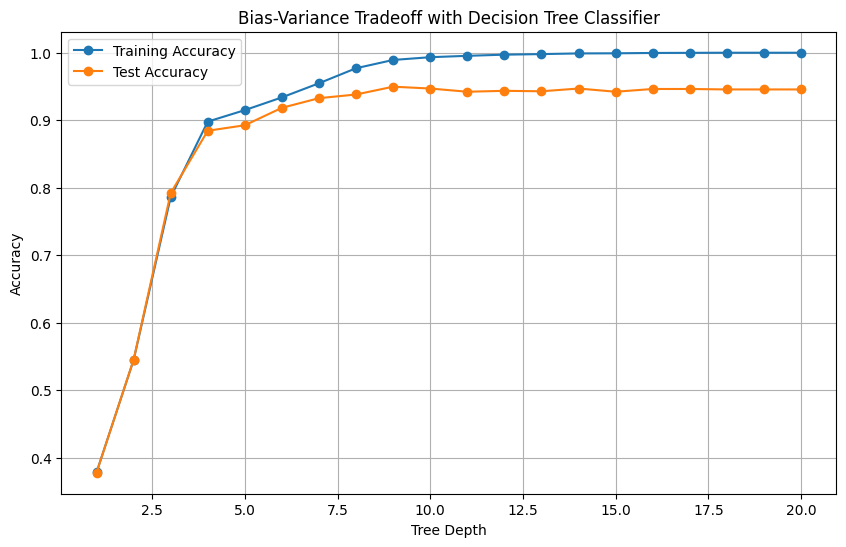

In [19]:
# Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(tree_depths, test_accuracies, label="Test Accuracy", marker='o')
plt.title("Bias-Variance Tradeoff with Decision Tree Classifier")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


This code separates the features (X_test) and the target variable (y_test) from the test dataset (df_test). The "Activity" column is dropped from df_test to create X_test, which contains the feature data, and y_test contains the target labels "Activity" column.

Conclusion: The above graph shows the training and Test accuracy of the Decision Tree classifier across depth from range 1 to 20. For the starting 3 tree depths, models both the training and test accuracies are less. Thus, the model is too simple to capture patterns in the data and has a high bias and results in underfitting. In contrast, for the tree depth 12 to 20 we can observe a plateau showing no difference in improvement. The training accuracy is 100% showing that the training data is overfitted and that it is learning all the noisy points in that dataset indicating high variance. As the testing accuracy reaches a plateau we can see that it stops generalizing new data showing no improvements in testing accuracy.


Optimal depth:
We can see that  for the tree depth 4 to 10 the testing accuracy improves significantly, and approaches its maximum. There is a small separation between them which indicates a good tradeoff between bias and variance.


**Approach 2:** Data used is X_train + y_train for training and X_test and y_test for testing


Description:  Used  X_train + y_train for training and X_test and y_test for testing. Used Decision tree classifier with varying tree depth from range 1 to 20.


In [20]:
x_test = df_test.drop(columns=["Activity"])
y_test = df_test["Activity"]

Training the decison tree clasifier for different tree depths from 1 to 20.


For each tree depth:
Predictions are made on testing data.
Testing accuracies are calculated and stored.

In [21]:
# Training the decison tree clasifier for different tree depths from 1 to 20 for all train lables
X = df_train.drop(columns=["Activity"])
y = df_train["Activity"]

train_accuracies = []
test_accuracies = []
tree_depths = range(1, 21)

for depth in tree_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X, y)

    #prediction on all test labels
    y_test_pred = model.predict(x_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))



This code iterates through different tree depths and corresponding test accuracies, printing the results for each depth to analyze model performance.

In [22]:
for depth, test_acc in zip(tree_depths, test_accuracies):
    print(f"Depth: {depth}, Test Accuracy: {test_acc:.4f}")

Depth: 1, Test Accuracy: 0.3627
Depth: 2, Test Accuracy: 0.5310
Depth: 3, Test Accuracy: 0.7224
Depth: 4, Test Accuracy: 0.8096
Depth: 5, Test Accuracy: 0.8381
Depth: 6, Test Accuracy: 0.8544
Depth: 7, Test Accuracy: 0.8619
Depth: 8, Test Accuracy: 0.8683
Depth: 9, Test Accuracy: 0.8700
Depth: 10, Test Accuracy: 0.8626
Depth: 11, Test Accuracy: 0.8687
Depth: 12, Test Accuracy: 0.8643
Depth: 13, Test Accuracy: 0.8605
Depth: 14, Test Accuracy: 0.8527
Depth: 15, Test Accuracy: 0.8629
Depth: 16, Test Accuracy: 0.8595
Depth: 17, Test Accuracy: 0.8599
Depth: 18, Test Accuracy: 0.8622
Depth: 19, Test Accuracy: 0.8622
Depth: 20, Test Accuracy: 0.8622


This code generates a plot to visualize the Bias-Variance Tradeoff. It shows the test accuracies for different tree depths. The plot helps identify how the model performs with increasing complexity, highlighting potential underfitting (high bias) and overfitting (high variance).

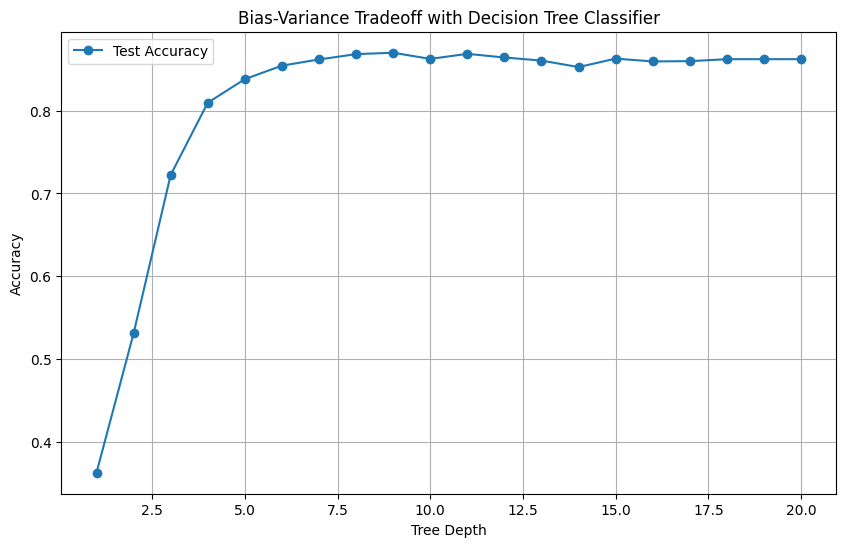

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, test_accuracies, label="Test Accuracy", marker='o')
plt.title("Bias-Variance Tradeoff with Decision Tree Classifier")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Conclusion: The above graph shows the training and Test accuracy of the Decision Tree classifier across depth from range 1 to 20. For the starting 3 tree depths the models test accuracies are less. Thus, the model is too simple to capture patterns in the data and has a high bias and results in underfitting. In contrast, for the tree depth 12 to 20 we can observe a plateau showing no difference in improvement except a slight drop at tree depth of 14. As the testing accuracy reaches a plateau we can see that it stops generalizing new data showing no improvements in testing accuracy and no improvements by increasing the tree depth.


Optimal depth:
We can see that  for the tree depth 5 to 10 the testing accuracy improves significantly and reaches its peak around 87%, and approaches its maximum. There is a small separation between them which indicates a good tradeoff between bias and variance.
